# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Kristen Finley
### Github Repository Link: https://github.com/AnalysisKris/web-scraping

Perform the tasks described in the Markdown cells below. When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.


---

# Question 1.


Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)


In [63]:
import requests
from bs4 import BeautifulSoup
import pickle

# The URL of the article
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the web page
response = requests.get(url)

# Use BeautifulSoup to parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the article content
article_content = soup.find("article")

# Serialize the extracted article HTML to a .pkl file
with open('article_content.pkl', 'wb') as file:
    pickle.dump(str(article_content), file)

print("The article's HTML content has been saved to 'article_content.pkl'")


The article's HTML content has been saved to 'article_content.pkl'


---

# Question 2.


Read in your article's html source from the file you created in question 1 and print it's text (use .get_text())

In [64]:
import pickle

# Read the serialized HTML content from the file
with open('article_content.pkl', 'rb') as file:
    article_html = pickle.load(file)

# Convert the HTML content back to BeautifulSoup object
article_soup = BeautifulSoup(article_html, 'html.parser')

# Get the text from the BeautifulSoup object
article_text = article_soup.get_text()

# Print the article text
print(article_text)




How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

---

# Question 3.


Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case). Print the common tokens with an appropriate label. Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).


In [65]:
import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy pipeline
doc = nlp(article_text)

# Filter out punctuation, stopwords, symbols, numbers, and whitespace
filtered_tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop and not token.is_digit and not token.is_currency and not token.is_quote and not token.is_bracket and '/' not in token.text]

# Count the frequency of each token
token_freq = Counter(filtered_tokens)

# Get the 5 most frequent tokens
top_5_tokens = token_freq.most_common(5)

# Print the most frequent tokens with appropriate labels
print("Top 5 most frequent tokens:")
for token, frequency in top_5_tokens:
    print(f"{token}: {frequency}")

# Print all tokens and their frequencies with appropriate labels
print("\nTokens and their frequencies:")
for token, frequency in token_freq.items():
    print(f"{token}: {frequency}")


Top 5 most frequent tokens:
laser: 35
headlights: 19
headlight: 11
technology: 10
led: 10

Tokens and their frequencies:
laser: 35
headlights: 19
work: 2
comments: 1
lewin: 1
day: 3
march: 2
think: 1
onward: 1
automotive: 6
technology: 10
usually: 1
thing: 2
come: 5
mind: 3
engines: 1
fuel: 1
efficiency: 3
switch: 2
electric: 1
power: 3
mean: 1
thousands: 1
engineers: 2
world: 2
working: 1
improve: 1
state: 2
art: 1
lighting: 4
sealed: 2
beam: 7
gave: 1
way: 4
modern: 2
designs: 3
regulations: 1
loosened: 1
bulbs: 1
moved: 2
simple: 3
halogens: 1
xenon: 1
hids: 1
recently: 1
leds: 6
new: 3
scene: 1
lasers: 5
bwm: 2
prototype: 1
headlight: 11
assemblies: 1
undergoing: 1
testing: 1
image: 2
brought: 1
phrase: 1
beams: 5
firing: 1
automobile: 1
obviously: 1
coherent: 1
monochromatic: 1
light: 9
poor: 1
illumination: 2
outside: 1
specific: 1
spot: 2
distance: 1
away: 1
thankfully: 2
eyes: 1
instead: 1
consist: 1
solid: 1
diodes: 2
mounted: 1
inside: 3
blue: 1
fired: 1
yellow: 1
phosphor: 3

---

# Question 4.


Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case). Print the common lemmas with an appropriate label. Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).


In [66]:
import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy pipeline
doc = nlp(article_text)

# Filter out punctuation, stopwords, and whitespace, and get lemmas
filtered_lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop]

# Count the frequency of each lemma
lemma_freq = Counter(filtered_lemmas)

# Get the 5 most frequent lemmas
top_5_lemmas = lemma_freq.most_common(5)

# Print the most frequent lemmas with appropriate labels
print("Top 5 most frequent lemmas:")
for lemma, frequency in top_5_lemmas:
    print(f"{lemma}: {frequency}")

# Print all lemmas and their frequencies with appropriate labels
print("\nLemmas and their frequencies:")
for lemma, frequency in lemma_freq.items():
    print(f"{lemma}: {frequency}")


Top 5 most frequent lemmas:
laser: 40
headlight: 28
beam: 12
technology: 10
light: 10

Lemmas and their frequencies:
laser: 40
headlights: 2
work: 3
130: 1
comments: 1
lewin: 1
day: 4
march: 2
22: 1
2021: 1
think: 1
onward: 1
automotive: 6
technology: 10
headlight: 28
usually: 1
thing: 3
come: 7
mind: 3
engine: 1
fuel: 1
efficiency: 3
switch: 2
electric: 1
power: 3
mean: 2
thousand: 1
engineer: 2
world: 2
improve: 1
state: 2
art: 1
lighting: 4
seal: 1
beam: 12
give: 1
way: 4
modern: 2
design: 6
regulation: 1
loosen: 1
bulb: 1
move: 2
simple: 3
halogen: 1
xenon: 1
hids: 1
recently: 1
led: 7
new: 3
scene: 1
bwm: 2
prototype: 1
assembly: 2
undergo: 1
testing: 1
image: 2
bring: 2
phrase: 1
fire: 2
automobile: 2
obviously: 1
coherent: 1
monochromatic: 1
light: 10
poor: 1
illumination: 2
outside: 1
specific: 1
spot: 2
distance: 1
away: 1
thankfully: 2
eye: 1
instead: 1
consist: 1
solid: 1
diode: 5
mount: 1
inside: 3
blue: 1
yellow: 1
phosphor: 3
similar: 1
white: 2
produce: 1
powerful: 2
vib

---

# Question 5.


Define the following methods:

- `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
- `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence

You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well). Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.


In [67]:
import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy pipeline
doc = nlp(article_text)

# Filter out punctuation, stopwords, and whitespace, and get lemmas
filtered_lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop]

# Count the frequency of each lemma
lemma_freq = Counter(filtered_lemmas)

# Get the 5 most frequent lemmas
top_5_lemmas = lemma_freq.most_common(5)

# Define method to score sentence by token
def score_sentence_by_token(sentence, interesting_tokens):
    # Tokenize the sentence
    words = sentence.split()
    # Count interesting tokens
    interesting_count = sum(1 for word in words if word.lower() in interesting_tokens)
    # Return score
    return interesting_count / len(words)

# Define method to score sentence by lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Process the sentence using spaCy pipeline
    doc = nlp(sentence)
    # Get lemmas
    lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
    # Count interesting lemmas
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    # Return score
    return interesting_count / len(lemmas)

# Test the methods with the first sentence of the article
first_sentence = list(doc.sents)[0].text

# Score by token using top 5 frequent tokens
token_scores = score_sentence_by_token(first_sentence, [token.lower() for token, _ in top_5_tokens])
print("Score by token:", token_scores)

# Score by lemma using top 5 frequent lemmas
lemma_scores = score_sentence_by_lemma(first_sentence, [lemma.lower() for lemma, _ in top_5_lemmas])
print("Score by lemma:", lemma_scores)


Score by token: 0.16666666666666666
Score by lemma: 0.1


---

# Question 6.


Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?


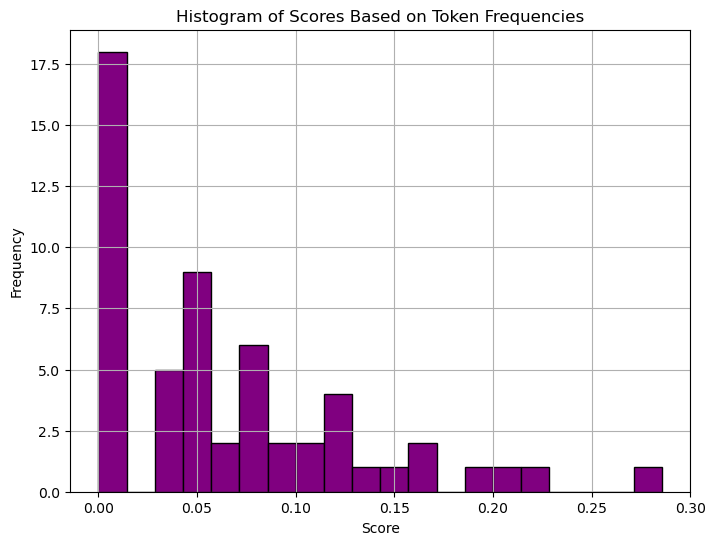

In [72]:
import matplotlib.pyplot as plt

# Define the list to store scores
token_scores_list = []

# Iterate through each sentence in the article
for sentence in doc.sents:
    # Calculate the score for the sentence using token frequencies
    score = score_sentence_by_token(sentence.text, [token.lower() for token, _ in top_5_tokens])
    # Append the score to the list
    token_scores_list.append(score)

# Plot a histogram of the scores
plt.figure(figsize=(8, 6))
plt.hist(token_scores_list, bins=20, color='purple', edgecolor='black')
plt.title('Histogram of Scores Based on Token Frequencies')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# The most common range of scores: 0.00 to 0.05

---

# Question 7.


Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?


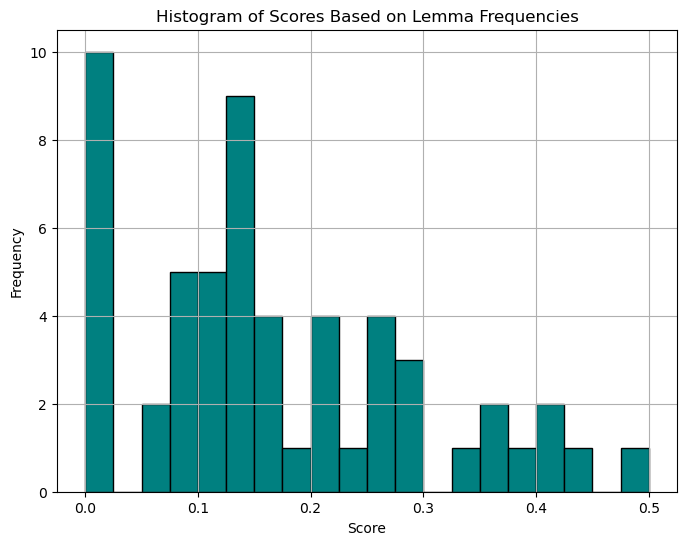

In [73]:
import matplotlib.pyplot as plt

# Define the list to store scores
lemma_scores_list = []

# Iterate through each sentence in the article
for sentence in doc.sents:
    # Calculate the score for the sentence using lemma frequencies
    score = score_sentence_by_lemma(sentence.text, [lemma.lower() for lemma, _ in top_5_lemmas])
    # Append the score to the list
    lemma_scores_list.append(score)

# Plot a histogram of the scores
plt.figure(figsize=(8, 6))
plt.hist(lemma_scores_list, bins=20, color='teal', edgecolor='black')
plt.title('Histogram of Scores Based on Lemma Frequencies')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# The most common range of scores: 0.1 to 0.2

---

# Question 8


Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words? How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

#### Response:
To only consider nouns as interesting words, omit tokens and lemmas that are not nouns (people, places, things, or ideas). i.e. exclude tokens and lemmas that are verbs, adjectives, adverbs, pronouns, and other non-noun parts of speech.

, modify the filtering condition in the list comprehensions to include only tokens or lemmas that are nouns. To do this use spaCy, the pos_ attribute of tokens represents the part-of-speech tag, and we can filter tokens based on this attribute to include only nouns.



Top 5 most frequent nouns:
laser: 30
headlights: 17
technology: 10
beam: 7
leds: 6

Nouns and their frequencies:
technology: 10
headlights: 17
thing: 2
engines: 1
fuel: 1
efficiency: 3
switch: 2
power: 3
mind: 2
thousands: 1
engineers: 2
world: 2
state: 2
art: 1
lighting: 4
day: 2
beam: 7
way: 4
designs: 3
regulations: 1
bulbs: 1
halogens: 1
leds: 6
scene: 1
lasers: 5
prototype: 1
laser: 30
assemblies: 1
testing: 1
image: 2
phrase: 1
beams: 5
automobile: 1
light: 5
illumination: 2
spot: 2
distance: 1
eyes: 1
diodes: 2
headlight: 5
phosphor: 3
reflectors: 1
road: 2
benefits: 2
energy: 1
space: 1
i8: 1
vehicles: 3
nascent: 1
partnership: 1
experts: 1
practice: 1
lamp: 1
meters: 1
vehicle: 1
lights: 1
diode: 3
projectors: 1
levels: 1
watt: 1
challenges: 2
environment: 2
need: 1
temperature: 2
extremes: 1
research: 1
pointers: 1
room: 1
temperatures: 1
degrees: 2
heat: 1
output: 2
things: 1
engineering: 1
optics: 1
package: 2
tumble: 1
vibration: 1
application: 2
device: 1
end: 4
user: 1
r

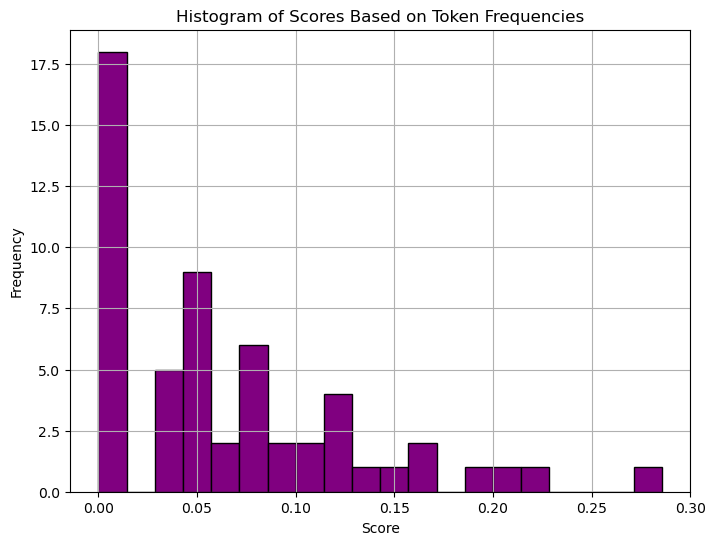

In [74]:
# For Question 3:
import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy pipeline
doc = nlp(article_text)

# Filter out punctuation, stopwords, symbols, numbers, and whitespace, and get nouns
filtered_tokens = [token.text.lower() for token in doc if token.pos_ == "NOUN" and not token.is_punct and not token.is_space and not token.is_stop and not token.is_digit and not token.is_currency and not token.is_quote and not token.is_bracket and '/' not in token.text]

# Count the frequency of each noun
token_freq = Counter(filtered_tokens)

# Get the 5 most frequent nouns
top_5_nouns = token_freq.most_common(5)

# Print the most frequent nouns with appropriate labels
print("Top 5 most frequent nouns:")
for noun, frequency in top_5_nouns:
    print(f"{noun}: {frequency}")

# Print all nouns and their frequencies with appropriate labels
print("\nNouns and their frequencies:")
for noun, frequency in token_freq.items():
    print(f"{noun}: {frequency}")

# Define the list to store scores
token_scores_list = []

# Iterate through each sentence in the article
for sentence in doc.sents:
    # Calculate the score for the sentence using token frequencies
    score = score_sentence_by_token(sentence.text, [token.lower() for token, _ in top_5_tokens])
    # Append the score to the list
    token_scores_list.append(score)

# Plot a histogram of the scores
plt.figure(figsize=(8, 6))
plt.hist(token_scores_list, bins=20, color='purple', edgecolor='black')
plt.title('Histogram of Scores Based on Token Frequencies')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Top 5 most frequent lemmas:
laser: 35
headlight: 22
beam: 12
technology: 10
led: 6

Lemmas and their frequencies:
technology: 10
headlight: 22
thing: 3
engine: 1
fuel: 1
efficiency: 3
switch: 2
power: 3
mind: 2
thousand: 1
engineer: 2
world: 2
state: 2
art: 1
lighting: 4
day: 3
beam: 12
way: 4
design: 4
regulation: 1
bulb: 1
halogen: 1
led: 6
scene: 1
laser: 35
prototype: 1
assembly: 2
testing: 1
image: 2
phrase: 1
automobile: 2
light: 6
illumination: 2
spot: 2
distance: 1
eye: 1
diode: 5
phosphor: 3
reflector: 1
road: 2
benefit: 2
energy: 1
space: 1
i8: 1
vehicle: 4
nascent: 1
partnership: 1
expert: 1
practice: 1
lamp: 2
meter: 1
projector: 2
level: 1
watt: 1
challenge: 2
environment: 2
need: 1
temperature: 3
extreme: 1
research: 1
pointer: 1
room: 1
degree: 2
heat: 1
output: 2
engineering: 1
optic: 1
package: 2
tumble: 1
vibration: 1
application: 2
device: 1
end: 4
user: 2
radiation: 1
event: 2
accident: 1
malfunction: 1
marketing: 1
construction: 1
aftermarket: 6
grain: 1
salt: 1
w:

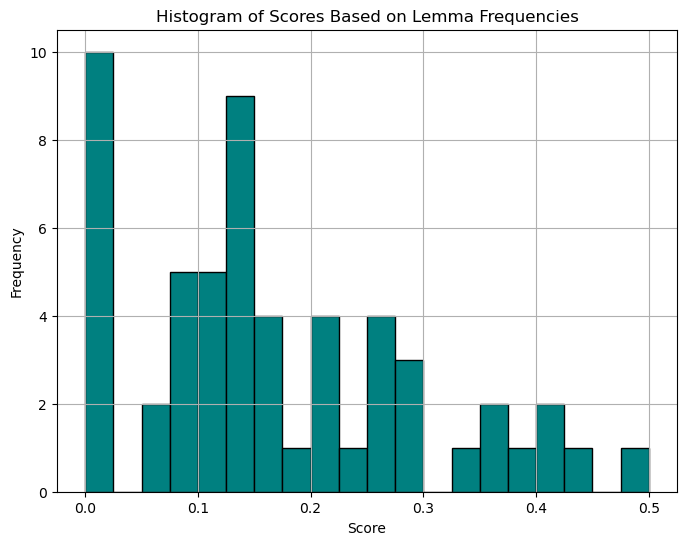

In [75]:
# For Question 4:
import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Process the article text using spaCy pipeline
doc = nlp(article_text)

# Filter out punctuation, stopwords, and whitespace, and get lemmas
filtered_lemmas = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN" and not token.is_punct and not token.is_space and not token.is_stop]

# Count the frequency of each lemma
lemma_freq = Counter(filtered_lemmas)

# Get the 5 most frequent lemmas
top_5_lemmas = lemma_freq.most_common(5)

# Print the most frequent lemmas with appropriate labels
print("Top 5 most frequent lemmas:")
for lemma, frequency in top_5_lemmas:
    print(f"{lemma}: {frequency}")

# Print all lemmas and their frequencies with appropriate labels
print("\nLemmas and their frequencies:")
for lemma, frequency in lemma_freq.items():
    print(f"{lemma}: {frequency}")

lemma_scores_list = []

# Iterate through each sentence in the article
for sentence in doc.sents:
    # Calculate the score for the sentence using lemma frequencies
    score = score_sentence_by_lemma(sentence.text, [lemma.lower() for lemma, _ in top_5_lemmas])
    # Append the score to the list
    lemma_scores_list.append(score)

# Plot a histogram of the scores
plt.figure(figsize=(8, 6))
plt.hist(lemma_scores_list, bins=20, color='teal', edgecolor='black')
plt.title('Histogram of Scores Based on Lemma Frequencies')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [76]:
# Export  notebook as HTML for submission
!jupyter nbconvert --to html web-scraping.ipynb

[NbConvertApp] Converting notebook web-scraping.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 456702 bytes to web-scraping.html
